In [5]:
import cv2 
import os
import numpy as np
from scipy import ndimage
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#os.environ['CUDA_VISIBLE_DEVICES'] = '1,2'

# 获取图片信息 返回图片地址以及图片标签
def All_PicInfo(paths):
    images = []
    labels = []
    path_dir = os.listdir(paths)
    
    for p in path_dir:
        img1=os.listdir(paths+'/'+p) ##img为对应路径下的文件夹
        for i in img1:
            img_path=paths+'/'+p+'/'+i
            #img_path=path+'/'+p ##是的话获取图片路径
            img = cv2.imread(img_path)
            images.append(img)
            labels.append(int(p))
    return np.asarray(images,dtype=np.float32),np.array(labels,dtype=np.int8)



paths = r"C:/Users/Administrator/Desktop/cut_mango"
    
images,labels = All_PicInfo(paths)

# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size = 0.2)

#将原始数据转换为[0, 1]区间  数据归一化
x_train = x_train.astype('float32') / 255
x_test =x_test.astype('float32') / 255
#类别向量转为多分类矩阵
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)


In [6]:
x_train.shape

(1690, 128, 128, 3)

In [3]:
## 搭建神经网络
model = Sequential()

model.add(Conv2D(64, kernel_size=3, strides = 1, padding='SAME',            # 128*128*64
                 data_format = 'channels_last', activation = 'relu', input_shape = (128,128,3)))       
model.add(Conv2D(64,kernel_size=3, activation = 'relu'))                    # 126*126*64
model.add(MaxPooling2D(pool_size = 2, strides = 2, padding='SAME'))         # 64*64*64
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, strides = 1, padding='SAME',            # 64*64*128
                 data_format = 'channels_last', activation = 'relu'))       
model.add(Conv2D(128,kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2, padding='SAME'))         # 32*32*128
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0

In [3]:
opt = keras.optimizers.RMSprop(lr = 0.0001,decay = 1e-6)
#使用均方根反向传播(RMSprop)训练模型
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
#要求存储最佳模型
checkpointer = ModelCheckpoint(filepath = r'C:/Users/Administrator/Desktop/mango1_CNNbest.hdf5',
                               monitor = 'val_loss',
                               mode = 'min',
                               save_best_only = True, 
                               verbose = 1)
callback_list = [checkpointer]
hist = model.fit(x_train, y_train,batch_size = 128,
          epochs = 50,validation_data = (x_test, y_test),
          shuffle = True,callbacks = callback_list)

model.save(r'C:/Users/Administrator/Desktop/mango1.hdf5') #保存最终模型用于对比
model.load_weights(r'C:/Users/Administrator/Desktop/mango_CNNbest.hdf5')
model.evaluate(x_test, y_test)

Train on 1690 samples, validate on 423 samples
Epoch 1/50
1664/1690 [============================>.] - ETA: 7s - loss: 1.6684 - accuracy: 0.3894 
Epoch 00001: val_loss improved from inf to 0.84372, saving model to C:/Users/Administrator/Desktop/mango1_CNNbest.hdf5
1690/1690 [==============================] - 489s 289ms/sample - loss: 1.6573 - accuracy: 0.3923 - val_loss: 0.8437 - val_accuracy: 0.8865
Epoch 2/50
1664/1690 [============================>.] - ETA: 6s - loss: 0.5170 - accuracy: 0.8017 
Epoch 00002: val_loss improved from 0.84372 to 0.15640, saving model to C:/Users/Administrator/Desktop/mango1_CNNbest.hdf5
1690/1690 [==============================] - 464s 274ms/sample - loss: 0.5126 - accuracy: 0.8036 - val_loss: 0.1564 - val_accuracy: 0.9527
Epoch 3/50
1664/1690 [============================>.] - ETA: 6s - loss: 0.2182 - accuracy: 0.9207 
Epoch 00003: val_loss did not improve from 0.15640
1690/1690 [==============================] - 435s 257ms/sample - loss: 0.2180 - accur

Epoch 28/50
1664/1690 [============================>.] - ETA: 7s - loss: 0.0074 - accuracy: 0.9988 
Epoch 00028: val_loss did not improve from 0.01849
1690/1690 [==============================] - 482s 285ms/sample - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0628 - val_accuracy: 0.9905
Epoch 29/50
1664/1690 [============================>.] - ETA: 6s - loss: 0.0095 - accuracy: 0.9952 
Epoch 00029: val_loss did not improve from 0.01849
1690/1690 [==============================] - 451s 267ms/sample - loss: 0.0093 - accuracy: 0.9953 - val_loss: 0.1900 - val_accuracy: 0.9598
Epoch 30/50
1664/1690 [============================>.] - ETA: 6s - loss: 0.1600 - accuracy: 0.9531 
Epoch 00030: val_loss did not improve from 0.01849
1690/1690 [==============================] - 452s 267ms/sample - loss: 0.1580 - accuracy: 0.9538 - val_loss: 0.1504 - val_accuracy: 0.9504
Epoch 31/50
1664/1690 [============================>.] - ETA: 6s - loss: 0.0773 - accuracy: 0.9730 
Epoch 00031: val_loss did not 

[0.024672978914323004, 0.99527186]

Text(0, 0.5, 'loss')

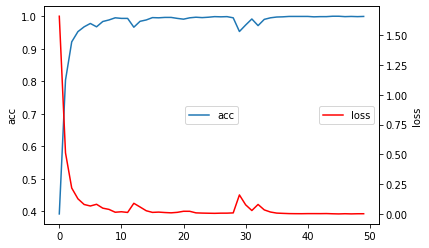

In [73]:
loss = hist.history(['loss'])
acc = hist.history(['accuracy'])
plt.plot(acc,label="acc")
plt.ylabel('acc')
plt.legend(loc = 10)
ax2 = plt.gca().twinx()
plt.plot(loss,color='red',label='loss')
plt.legend(loc = 5)
plt.ylabel('loss')

In [11]:
from tensorflow.keras.models import load_model

path = r'C:/Users/Administrator/Desktop/mango1_CNNbest.hdf5'
model = load_model(path)


In [12]:
model.load_weights(path)

423/423 [==============================] - 15s 36ms/sample - loss: 0.0037 - accuracy: 0.9976


[0.003674753716821357, 0.99763596]

In [45]:
los,acc = model.evaluate(x_test, y_test)

423/423 [==============================] - 16s 37ms/sample - loss: 0.0037 - accuracy: 0.9976
模型正确率为%2s 0.99763596


In [49]:

print('模型正确率为%0.4f'%acc)

模型正确率为0.9976


In [20]:
import numpy as np
y = np.argmax(y_test,axis = 1)
all_groundtruth_list = y

In [22]:
p = model.predict(x_test)
all_predict_list= np.argmax(p,axis=1)

In [23]:
all_label_list = [0,1,2]

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

# 准确率 召回率 F1 每个类的数据量
precision_recall_report = classification_report(
              y_true=all_groundtruth_list,
              y_pred=all_predict_list,
              #labels=list(range(0,len(all_label_list))),
              #labels=[0,1,2],
              #target_names=[0,1,2]
)
print(precision_recall_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.99      1.00      1.00       142
           2       1.00      0.99      1.00       164

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



In [30]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(
         y_true=all_groundtruth_list,
         y_pred=all_predict_list,
         labels=list(range(0,3)))
print(matrix)

[[117   0   0]
 [  0 142   0]
 [  0   1 163]]


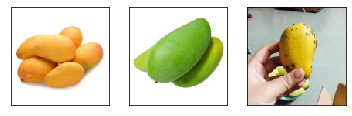

In [43]:
import matplotlib.pyplot as plt

path1 = r'C:\Users\Administrator\Desktop\4.jpg'
path2 = r'C:\Users\Administrator\Desktop\1.jpg'
#path3 = r'C:\Users\Administrator\Desktop\2.jpg'
path4 = r'C:\Users\Administrator\Desktop\7.jpg'
image1 = cv2.imread(path1)
image2 = cv2.imread(path2)
image3 = cv2.imread(path4)
#image4 = cv2.imread(path4)
image=[image1,image2,image3]

for j in range(3):
    plt.subplot(1,3,j+1)
    plt.imshow(image[j][...,::-1]/255)
    plt.xticks([])
    plt.yticks([])

In [44]:
im = np.asarray(image,dtype=np.float32)
pr = model.predict(im)
np.argmax(pr,axis = 1)

array([1, 0, 2], dtype=int64)